Based on https://nickmccullum.com/python-machine-learning/support-vector-machines-python/

# The Data Set We Will Use

In [56]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [57]:
import pandas as pd

raw_data = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])

print(raw_data)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

# Splitting the Data Set Into Training Data and Test Data

In [58]:
from sklearn.model_selection import train_test_split

x = raw_data

y = cancer_data['target']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

# Standardizing the Data Set
RLE: enhancement of tutorial: https://scikit-learn.org/stable/modules/svm.html: Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data.

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_training_data = sc.fit_transform(x_training_data)

x_test_data = sc.fit_transform(x_test_data)

# Training The Support Vector Machines Model

In [60]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_training_data, y_training_data)

SVC()

# Making Predictions With Our Support Vector Machines Model

In [61]:
predictions = model.predict(x_test_data)

# Assessing the Performance of Our Support Vector Machines Model

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        67
           1       0.94      0.98      0.96       104

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



<AxesSubplot:>

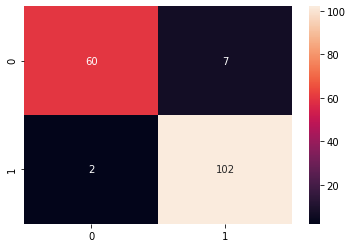

In [64]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_data, predictions)

df_cm = pd.DataFrame(cm)

sns.heatmap(df_cm, annot=True, fmt='d')

# Conclusion
@todo insert graphic representation
@todo trying different parameters to improve results